<a href="https://colab.research.google.com/github/ASUcicilab/GIS322/blob/main/notebook/Module_4_(3)_Creating_a_GeoDataFrame_from_Coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 Creating a GeoDataFrame from  coordinates





<br></br>
In this notebook, you will learn how to create a GeoDataFrame from a list of coordinates in python using `geopandas` library.






<p>First of all, lets find some interesting places on ASU campus. Here is a list of mine. Each place is linked with a pair of coordinates: latitude and longitude.&nbsp;</p>
<table style="border-collapse: collapse; width: 75.51282051282051%; height: 211px;" border="1">
<tbody>
<tr style="height: 24px;">
<td style="width: 33.333333333333336%; height: 24px;">Cities</td>
<td style="width: 33.333333333333336%; height: 24px;">Latitude</td>
<td style="width: 33.333333333333336%; height: 24px;">Longitude</td>
</tr>
<tr style="height: 24px;">
<td style="width: 33.333333333333336%; height: 24px;">New York</td>
<td style="width: 33.333333333333336%; height: 24px;"><span>40.7128</span></td>
<td style="width: 33.333333333333336%; height: 24px;"><span>-74.0060</span></td>
</tr>
<tr style="height: 24px;">
<td style="width: 33.333333333333336%; height: 24px;">Dallas</td>
<td style="width: 33.333333333333336%; height: 24px;"><span>32.7767</span></td>
<td style="width: 33.333333333333336%; height: 24px;"><span>-96.7970</span></td>
</tr>
<tr style="height: 24px;">
<td style="width: 33.333333333333336%; height: 24px;">Seattle</td>
<td style="width: 33.333333333333336%; height: 24px;"><span>47.6062</span></td>
<td style="width: 33.333333333333336%; height: 24px;"><span>-122.3321</span></td>
</tr>
<tr style="height: 24px;">
<td style="width: 33.333333333333336%; height: 24px;">Phoenix</td>
<td style="width: 33.333333333333336%; height: 24px;"><span>33.4484</span></td>
<td style="width: 33.333333333333336%; height: 24px;"><span>-112.0740</span></td>
</tr>
</tbody>
</table>

<br></br>
Then let's try to make a DataFrame from the list of places we have.

In [1]:
cities = [['New York', 40.7128, -74.0060],
          ['Dallas', 32.7767, -96.7970],
          ['Seattle', 47.6062, -122.3321],
          ['Phoenix', 33.4484, -112.0740]]

In [2]:
cities

[['New York', 40.7128, -74.006],
 ['Dallas', 32.7767, -96.797],
 ['Seattle', 47.6062, -122.3321],
 ['Phoenix', 33.4484, -112.074]]

In [3]:
import pandas as pd
cities_df = pd.DataFrame(cities, columns = ['Cities', 'Lat','Long'])

In [4]:
cities_df

,Cities,Lat,Long
0,New York,40.7128,-74.0060
1,Dallas,32.7767,-96.7970
2,Seattle,47.6062,-122.3321
3,Phoenix,33.4484,-112.0740


After that, we can use the method provided in geopandas `geopandas.points_from_xy(longitude, latitude)` to convert an ordinary `DataFrame` to `GeoDataFrame`.

In [5]:
!pip install geopandas
import geopandas as gpd

In [6]:
cities_gdf = gpd.GeoDataFrame(
    cities_df, geometry=gpd.points_from_xy(cities_df.Long, cities_df.Lat))

<br></br>
Plot it to see if it looks right.

<Axes: >

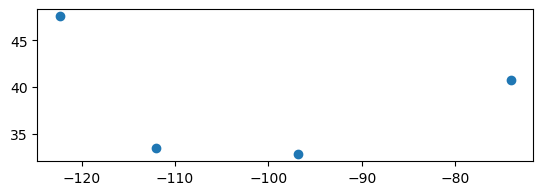

In [7]:
cities_gdf.plot()

<br></br>
For better to look at it, we need a basemap, let's read in the US map we have made in the Module 4.1.

In [8]:
%matplotlib inline

In [9]:
contig = gpd.read_file("../data/US_lower_48/US_lower_48.shp")

<Axes: >

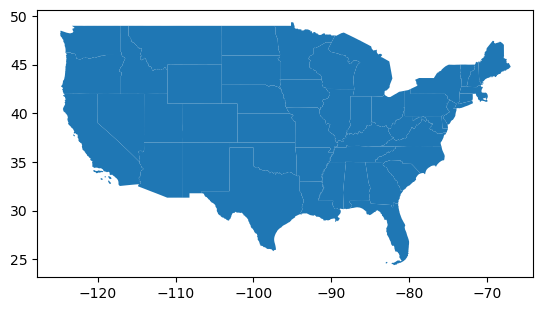

In [10]:
contig.plot()

<br></br>
<font size="3">Overlay both together, it seems alright!</font>

<Axes: >

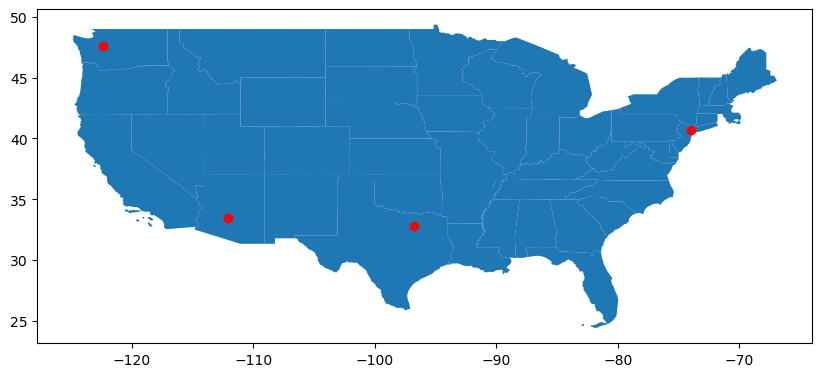

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,figsize=(10,10))
contig.plot(ax=ax)
cities_gdf.plot(ax=ax,color="red")